In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import seaborn as sns

In [2]:
path = r"C:\Users\bbuser\maather\flats\surat_uncleaned.csv"
df = pd.read_csv(path)
df

,property_name,areaWithType,square_feet,transaction,status,floor,furnishing,facing,description,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,Unfurnished,West,"Luxury project with basement parking, Solar ro...","₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,Unfurnished,South -West,2 And 3 BHK Luxurious Flat for Sell In New Alt...,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,Semi-Furnished,East,This affordable 2 BHK flat is situated along a...,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,Unfurnished,East,2 BHK Flat For sell IN Jahangirabad Prime Loca...,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,2,2,"Multistorey Apartment for Sale in Palanpur, Su...","₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,Unfurnished,South - East,"Check out Millionaires Lifestyle in Vesu, one ...",NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,Unfurnished,South - East,Superia is a premium residential project launc...,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,Unfurnished,North - East,"When it comes to beautiful homes, nothing beat...",NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,Unfurnished,North - West,"DRB Ravani Cellestial Dreams in Vesu, Surat is...",NaN,Call for Price


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4525 entries, 0 to 4524
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   property_name   4525 non-null   object
 1   areaWithType    4525 non-null   object
 2   square_feet     4525 non-null   object
 3   transaction     4421 non-null   object
 4   status          4524 non-null   object
 5   floor           4480 non-null   object
 6   furnishing      4185 non-null   object
 7   facing          3936 non-null   object
 8   description     3154 non-null   object
 9   price_per_sqft  4157 non-null   object
 10  price           4525 non-null   object
dtypes: object(11)
memory usage: 389.0+ KB


In [4]:
df.isnull().sum()

property_name        0
areaWithType         0
square_feet          0
transaction        104
status               1
floor               45
furnishing         340
facing             589
description       1371
price_per_sqft     368
price                0
dtype: int64

In [5]:
df = df.drop(['furnishing','facing','description'],axis = 1,errors = 'ignore') #axis = 1 (column index) this step deleted columns 
df

,property_name,areaWithType,square_feet,transaction,status,floor,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644 sqft,New Property,Poss. by Oct '24,5 out of 10,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278 sqft,New Property,Poss. by Jan '26,6 out of 14,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173 sqft,Resale,Ready to Move,5 out of 13,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700 sqft,New Property,Ready to Move,6 out of 14,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250 sqft,Orchid Fantasia,New Property,Unfurnished,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000 sqft,New Property,Poss. by Dec '26,5 out of 12,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600 sqft,New Property,Poss. by Dec '25,5 out of 16,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250 sqft,New Property,Poss. by Dec '25,7 out of 13,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450 sqft,New Property,Ready to Move,7 out of 18,NaN,Call for Price


In [6]:
# unifying the square_feet
def convert_area(area_str):
    if pd.isna(area_str):
        return np.nan
    area_str = area_str.lower().replace(",", "").strip()
    
    try:
        if "sqft" in area_str:
            return float(area_str.replace("sqft", "").strip())
        elif "sqm" in area_str:
            return float(area_str.replace("sqm", "").strip()) * 10.7639
        elif "sqyrd" in area_str:
            return float(area_str.replace("sqyrd", "").strip()) * 9
        elif "rood" in area_str:
            return float(area_str.replace("rood", "").strip()) * 10890
        else:
            return float(area_str)
    except:
        return np.nan

In [7]:
df['square_feet'] = df['square_feet'].apply(convert_area)
df

,property_name,areaWithType,square_feet,transaction,status,floor,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,"₹2,891 per sqft",₹33.8 Lac
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,"₹3,551 per sqft",₹45.4 Lac
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,"₹3,800 per sqft",₹44.6 Lac
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6 out of 14,"₹3,966 per sqft",₹47 Lac
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,New Property,Unfurnished,"₹3,600 per sqft",₹45 Lac
...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000.0,New Property,Poss. by Dec '26,5 out of 12,NaN,Call for Price
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600.0,New Property,Poss. by Dec '25,5 out of 16,NaN,Call for Price
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250.0,New Property,Poss. by Dec '25,7 out of 13,NaN,Call for Price
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450.0,New Property,Ready to Move,7 out of 18,NaN,Call for Price


In [8]:
df['price'].unique()

array(['₹33.8 Lac ', '₹45.4 Lac ', '₹44.6 Lac ', '₹47 Lac ', '₹45 Lac ',
       '₹43.2 Lac ', '₹42.1 Lac ', '₹44.1 Lac ', '₹44.3 Lac ', '₹40 Lac ',
       '₹44 Lac ', '₹12.5 Lac ', '₹50 Lac ', '₹35.8 Lac ', '₹26.5 Lac ',
       '₹42 Lac ', '₹43 Lac ', '₹20 Lac ', '₹37 Lac ', '₹29 Lac ',
       '₹38 Lac ', '₹13 Lac ', '₹46.5 Lac ', '₹41.6 Lac ', '₹33.5 Lac ',
       '₹42.5 Lac ', '₹48 Lac ', '₹32 Lac ', '₹35 Lac ', '₹46.2 Lac ',
       '₹38.5 Lac ', '₹23 Lac ', '₹24 Lac ', '₹28 Lac ', '₹35.7 Lac ',
       '₹36.5 Lac ', '₹36 Lac ', '₹43.6 Lac ', '₹25 Lac ', '₹41 Lac ',
       '₹28.5 Lac ', '₹9 Lac ', '₹30 Lac ', '₹39.5 Lac ', '₹21.5 Lac ',
       '₹10.5 Lac ', '₹18 Lac ', '₹10 Lac ', '₹23.5 Lac ', '₹16.3 Lac ',
       '₹13.5 Lac ', '₹49 Lac ', '₹21 Lac ', '₹39 Lac ', '₹16 Lac ',
       '₹27 Lac ', '₹15 Lac ', '₹39.9 Lac ', '₹7.5 Lac ', '₹12.8 Lac ',
       '₹9.5 Lac ', '₹31.5 Lac ', '₹46 Lac ', '₹6 Lac ', '₹34 Lac ',
       '₹22 Lac ', '₹19 Lac ', '₹8.5 Lac ', '₹11 Lac ', '₹16.5 Lac ',
 

In [9]:
# remove the symbole and , and takeoff the spaces 
def convert_price(value):
    if pd.isna(value):
        return np.nan
    value = str(value).lower()
    value = value.replace("₹", "").replace(",", "").strip()
    if 'cr' in value:
        return float(value.replace("cr", "").strip()) * 10000000 #converted to lac
    elif 'lac' in value:
        return float(value.replace("lac", "").strip()) * 100000 #converted to right value 
    else:
        try:
            return float(value)
        except:
            return np.nan

In [10]:
df['price'] = df['price'].apply(convert_price)
df

,property_name,areaWithType,square_feet,transaction,status,floor,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,"₹2,891 per sqft",3380000.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,"₹3,551 per sqft",4540000.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,"₹3,800 per sqft",4460000.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6 out of 14,"₹3,966 per sqft",4700000.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,New Property,Unfurnished,"₹3,600 per sqft",4500000.0
...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000.0,New Property,Poss. by Dec '26,5 out of 12,NaN,NaN
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600.0,New Property,Poss. by Dec '25,5 out of 16,NaN,NaN
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250.0,New Property,Poss. by Dec '25,7 out of 13,NaN,NaN
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450.0,New Property,Ready to Move,7 out of 18,NaN,NaN


In [11]:
#remove null value from square_feet
df = df.dropna(subset = ['square_feet'])
df

,property_name,areaWithType,square_feet,transaction,status,floor,price_per_sqft,price
0,2 BHK Apartment for Sale in Dindoli Surat,Carpet Area,644.0,New Property,Poss. by Oct '24,5 out of 10,"₹2,891 per sqft",3380000.0
1,2 BHK Apartment for Sale in Althan Surat,Super Area,1278.0,New Property,Poss. by Jan '26,6 out of 14,"₹3,551 per sqft",4540000.0
2,2 BHK Apartment for Sale in Pal Gam Surat,Super Area,1173.0,Resale,Ready to Move,5 out of 13,"₹3,800 per sqft",4460000.0
3,2 BHK Apartment for Sale in Jahangirabad Surat,Carpet Area,700.0,New Property,Ready to Move,6 out of 14,"₹3,966 per sqft",4700000.0
4,"2 BHK Apartment for Sale in Orchid Fantasia, P...",Super Area,1250.0,Orchid Fantasia,New Property,Unfurnished,"₹3,600 per sqft",4500000.0
...,...,...,...,...,...,...,...,...
4520,6 BHK Apartment for Sale in Millionaires Lifes...,Carpet Area,2000.0,New Property,Poss. by Dec '26,5 out of 12,NaN,NaN
4521,"4 BHK Apartment for Sale in Savan Superia, Alt...",Super Area,3600.0,New Property,Poss. by Dec '25,5 out of 16,NaN,NaN
4522,5 BHK Apartment for Sale in Roongta Green Vall...,Carpet Area,2250.0,New Property,Poss. by Dec '25,7 out of 13,NaN,NaN
4523,"6 BHK Apartment for Sale in Cellestial Dreams,...",Carpet Area,3450.0,New Property,Ready to Move,7 out of 18,NaN,NaN


In [12]:
#remove duplicates
df.drop_duplicates(keep = False,inplace = True)

C:\Users\bbuser\AppData\Local\Temp\ipykernel_8736\2995402195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep = False,inplace = True)


### feature engineering

In [13]:
df["price_per_sqft"] = df["price"] / df["square_feet"] #to get values 

C:\Users\bbuser\AppData\Local\Temp\ipykernel_8736\3218222651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price_per_sqft"] = df["price"] / df["square_feet"] #to get values


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 4524
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   4254 non-null   object 
 1   areaWithType    4254 non-null   object 
 2   square_feet     4254 non-null   float64
 3   transaction     4158 non-null   object 
 4   status          4254 non-null   object 
 5   floor           4210 non-null   object 
 6   price_per_sqft  4083 non-null   float64
 7   price           4083 non-null   float64
dtypes: float64(3), object(5)
memory usage: 299.1+ KB


### remove outliers 

In [15]:
# Calculate Q1 and Q3 (25th and 75th percentiles)
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

# Compute Interquartile Range (IQR)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within bounds (remove outliers)
df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

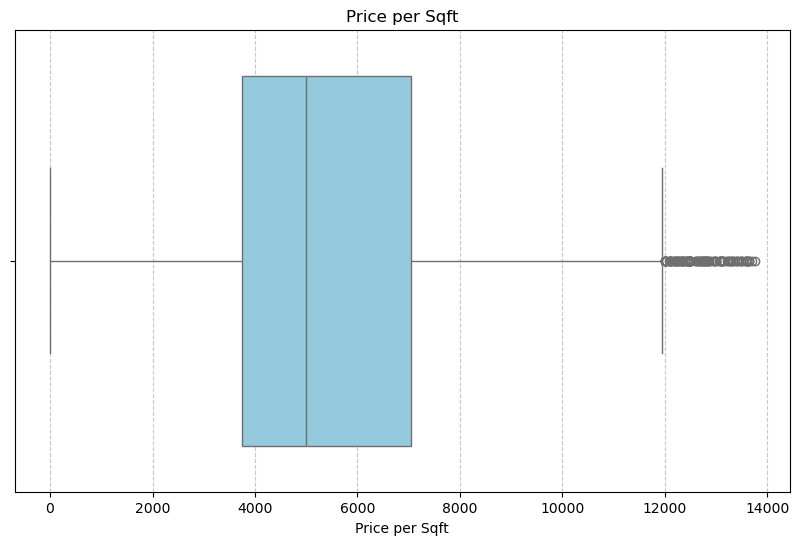

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = df["price_per_sqft"], color = "skyblue")
plt.title("Price per Sqft")
plt.xlabel("Price per Sqft")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 0 to 4517
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   property_name   3813 non-null   object 
 1   areaWithType    3813 non-null   object 
 2   square_feet     3813 non-null   float64
 3   transaction     3733 non-null   object 
 4   status          3813 non-null   object 
 5   floor           3774 non-null   object 
 6   price_per_sqft  3813 non-null   float64
 7   price           3813 non-null   float64
dtypes: float64(3), object(5)
memory usage: 268.1+ KB


In [23]:
cat_cols = ["property_name", "areaWithType", "transaction", "status", "floor"]
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

ValueError: Data must be 1-dimensional, got ndarray of shape (3813, 2091) instead

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define features (X) and target (y) from the DataFrame
X = df.drop(['price_per_sqft','price'], axis=1)
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (metrics explained later)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Linear Regression Results ---")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

AttributeError: 'numpy.ndarray' object has no attribute 'drop'